# Practica 9 - Diseño de Filtros con Respuesta Finita al Impulso (FIR)

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 06/11/2024

## Procedimiento

### 1. Implemente un filtro FIR con las siguientes caracterı́sticas:

Rechaza–banda, fc1=1kHz, fc2=4kHz, fs=16kHz, BW=200Hz, AdB=0

In [1]:
### 1. Implemente un filtro FIR con las siguientes caracterı́sticas: Rechaza–banda, fc1=1kHz, fc2=4kHz, fs=16kHz, BW=200Hz, AdB=0

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def choose_windows(name='Hamming', N=20):
    # Rect/Hanning/Hamming
    if name == 'Hamming':
        window = np.array([0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Hanning':
        window = np.array([0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Rect':
        window = np.ones(N)
    elif name == 'black':
        window = np.array([0.42-0.5*np.cos((2*np.pi*n)/(N-1))+0.08*np.cos((4*np.pi*n)/(N-1))for n in range(N)])
    return window

fc1 = 1000 #Hz
fc2 = 4000 #Hz
fs = 16000 #Hz
BW = 200 #Hz
AdB = 0

Nfft = 1024 # Numero de muestras de la FFT

# Calculo de las frecuencias normalizadas
wc1 = 2 * np.pi * fc1 / fs
wc2 = 2 * np.pi * fc2 / fs

# Calculo de ancho de banda normalizado
BWn = 2 * np.pi * BW / fs

# Calculo de M orden del filtro
M = int(4 // BWn)


# Respuesta al impulso del filtro rechaza banda
n = np.arange(-M, M + 1)
h1 = (wc1 / np.pi) * np.sinc((wc1 * n ) / np.pi) - (wc2 / np.pi) * np.sinc((wc2 * n) / np.pi)
h1 [n == 0] = 1 - (wc2 - wc1) / np.pi

# Ventana de Hamming
window = choose_windows('Hamming', len(h1))

# Aplicamos la ventana
h2 = h1 * window

# Calculo de la respuesta en frecuencia
h2 = h2 * np.sqrt(10**(AdB/10))
w, H1 = signal.freqz(h1, 1, Nfft, fs=fs) # Respuesta en frecuencia del filtro rechaza banda ideal
w, H2 = signal.freqz(h2, 1, Nfft, fs=fs) # Respuesta en frecuencia del filtro rechaza banda con ventana de Hamming


# Filtro rechaza banda ideal
H3 = np.zeros(len(w))
for idx, freq in enumerate(w):
    if freq <= fc1 or freq >= fc2:
        H3[idx] = 1


print("Orden del filtro: ", M, " muestras")
print("Ancho de banda BWn: ", BWn, "rad/s")
print("Frecuencia de corte WC1: ", wc1, "rad/s")
print("Frecuencia de corte WC2: ", wc2, "rad/s")
print("Frecuencia de muestreo: ", fs, "Hz")



Orden del filtro:  50  muestras
Ancho de banda BWn:  0.07853981633974483 rad/s
Frecuencia de corte WC1:  0.39269908169872414 rad/s
Frecuencia de corte WC2:  1.5707963267948966 rad/s
Frecuencia de muestreo:  16000 Hz


### 2. Grafique la respuesta al impulso del filtro asignado (hx de acuerdo con la notación usada). ¿Qué puede observar?

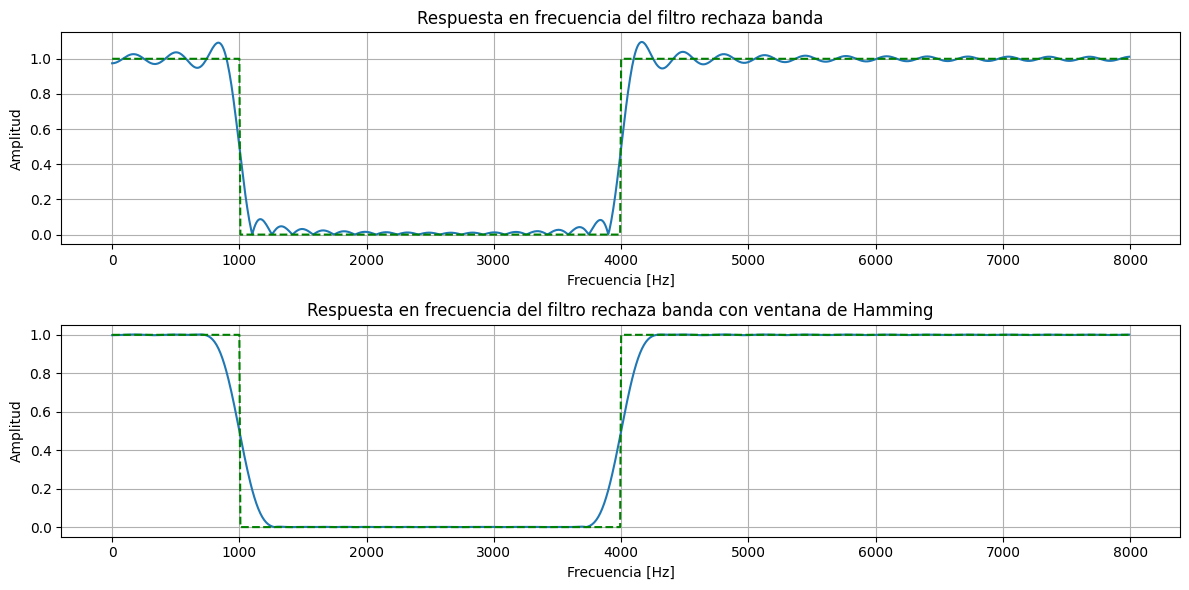

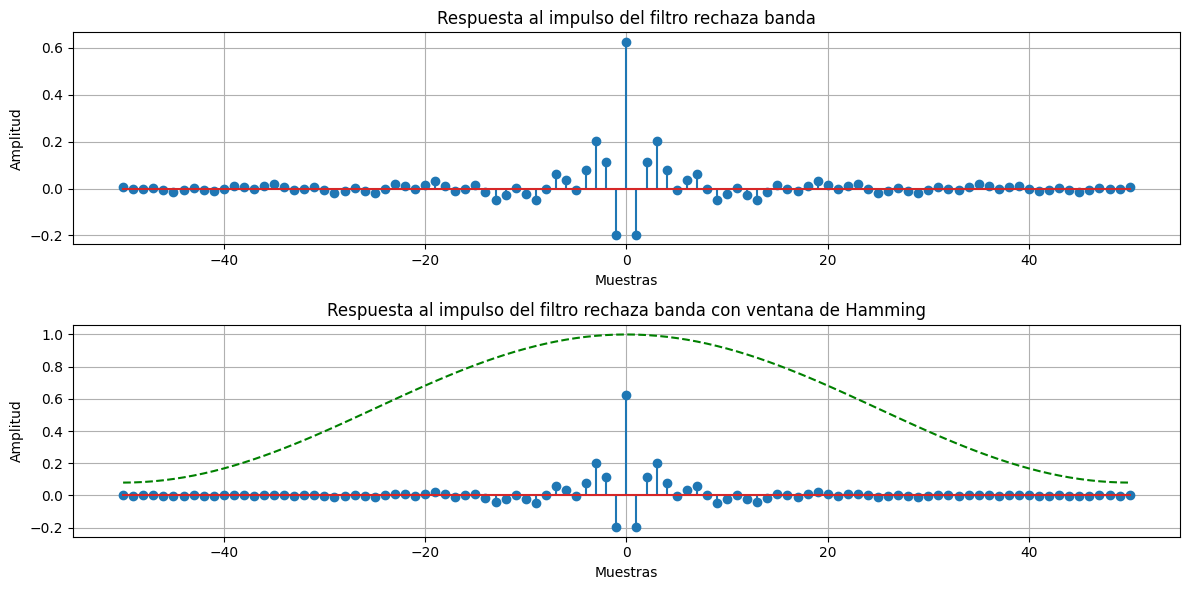

In [2]:
### 2. Grafique la respuesta al impulso del filtro asignado (hx de acuerdo con la notación usada). ¿Qué puede observar?

# Grafico de la respuesta de cada filtro en frecuencia y ventana de Hamming
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(H1))
plt.plot(w, np.abs(H3), '--', color='green')
plt.title('Respuesta en frecuencia del filtro rechaza banda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, np.abs(H2))
plt.plot(w, np.abs(H3), '--', color='green')
plt.title('Respuesta en frecuencia del filtro rechaza banda con ventana de Hamming')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()
plt.show()

# Grafico de la respuesta al de cada filtro
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(n, h1)
plt.title('Respuesta al impulso del filtro rechaza banda')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(2, 1, 2)
plt.stem(n, h2)

# Agregar ventana
plt.plot(n, window, '--', color='green')
plt.title('Respuesta al impulso del filtro rechaza banda con ventana de Hamming')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()
plt.show()


En la respuesta en frecuencia se evidencia que el filtro sin enventanado presenta un mayor nivel de ruido en los extremos, mientras que el filtro con ventana de Hamming presenta un nivel de ruido menor en los extremos. Ademas, se observa que el filtro con ventana de Hamming presenta un mayor nivel de atenuacion en las frecuencias de corte que el filtro sin ventana de Hamming. La pendiente de atenuacion en las frecuencias de corte es menor en el filtro con ventana de Hamming que en el filtro sin ventana de Hamming.

Las graficas de la respuesta al impulso muestran que el filtro con ventana de Hamming presenta un mayor nivel de atenuacion en los extremos que el filtro sin ventana de Hamming. 

### 3. Grafique la respuesta en frecuencia para el filtro asignado sin truncar y el truncado a partir de la ventana Hamming. ¿Qué puede observar

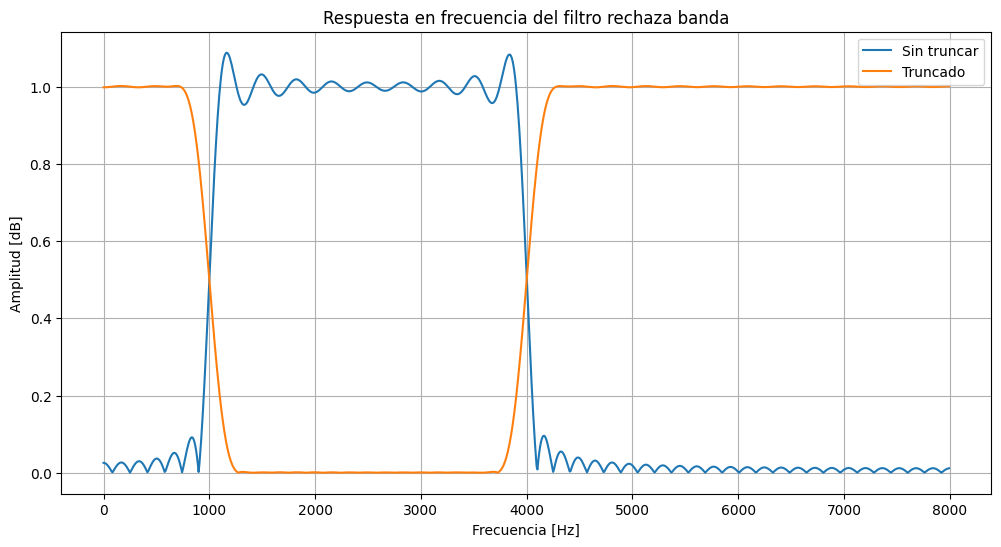

In [3]:
### 3. Grafique la respuesta en frecuencia para el filtro asignado sin truncar y el truncado a partir de la ventana Hamming. ¿Qué puede observar

h1_t = (wc1 / np.pi) * np.sinc((wc1 * n ) / np.pi) - (wc2 / np.pi) * np.sinc((wc2 * n) / np.pi)
w, H1_t = signal.freqz(h1_t, 1, Nfft, fs=fs) 
# Grafico de la respuesta de cada filtro en frecuencia y ventana de Hamming
plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(H1_t), label='Sin truncar')
plt.plot(w, np.abs(H2), label='Truncado')
plt.title('Respuesta en frecuencia del filtro rechaza banda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()


Originalmente partimos de un filtro pasa banda, al truncar este filtro pasa a ser un filtro rechaza banda, ademas debido al enventanado se corrigen las oscilaciones por fenemeno de Gibbs

## Filtrado de música con filtros FIR

### 1. Escriba un programa que grafique la señal correspondiente al último número de su cédula. Recuerde, normalizar la señal en amplitud, eliminar su nivel DC y crear su vector de tiempo dependiendo de la frecuencia de muestreo.

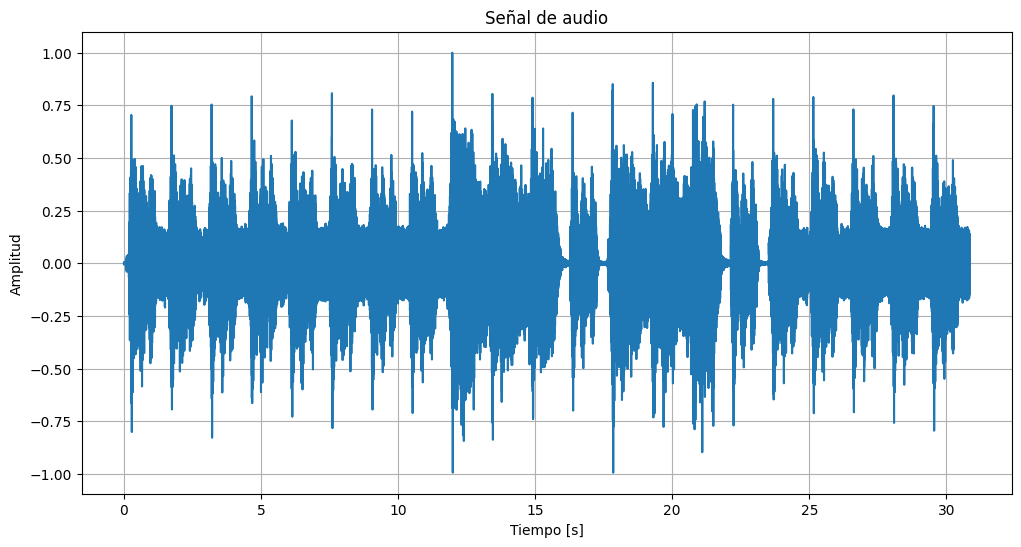

In [4]:
### 1. Escriba un programa que grafique la señal correspondiente al último número de su cédula. Recuerde, normalizar la señal en amplitud, eliminar su nivel DC y crear su vector de tiempo dependiendo de la frecuencia de muestreo.

# Numero de cedula: 0
# Nombre archivo: aduio1.wav

import scipy.io.wavfile as waves
from IPython.display import Audio


# Abrir archivo de audio
muestreo, audio = waves.read('audio1.wav')

# Normalizar la señal
audio = audio / np.max(np.abs(audio))

# Vector de tiempo
t = np.linspace(0, len(audio) / muestreo, num=len(audio))

# Grafico de la señal
plt.figure(figsize=(12, 6))
plt.plot(t, audio)
plt.title('Señal de audio')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

# Reproducir audio
display(Audio(audio, rate=muestreo))


### 2. ¿Qué instrumentos logra escuchar en el audio seleccionado?

Batería, Palmas Y Guitarra eléctrica

### 3. Diseñe un filtro FIR pasa-bajas con una banda de transición de 200 Hz, una frecuencia de corte de 600 Hz y un ripple de 60 dB.

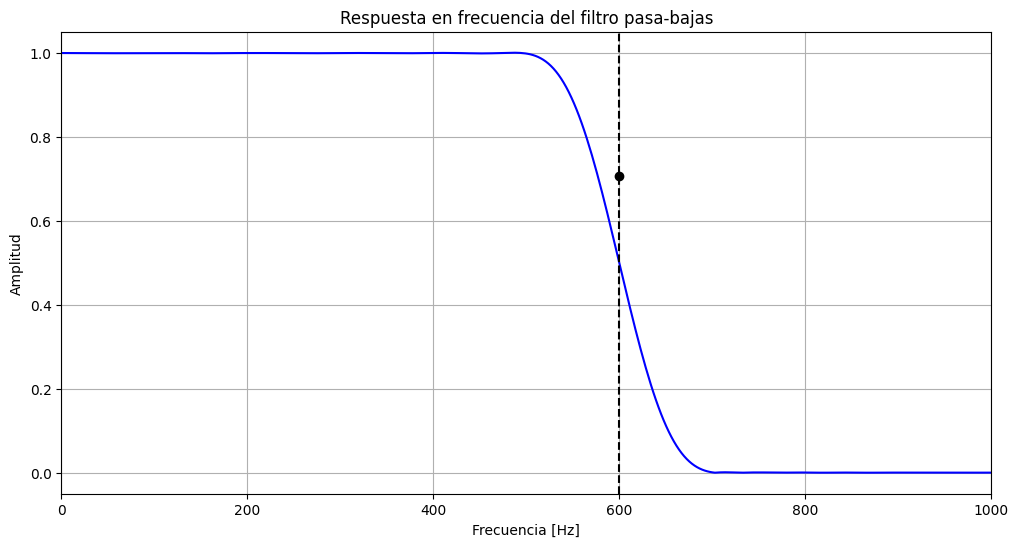

In [5]:
### 3. Diseñe un filtro FIR pasa-bajas con una banda de transición de 200 Hz, una frecuencia de corte de 600 Hz y un ripple de 60 dB.
from scipy.signal import firwin, freqz, kaiserord

# Parámetros del filtro
nyq_rate = muestreo / 2  # Frecuencia de Nyquist
roll_off = 200  # Ancho de banda de transición en Hz
cutoff_hz = 600  # Frecuencia de corte en Hz
ripple_db = 60  # dB de ripple en la banda de paso

# Cálculo del orden y parámetro beta usando la ventana de Kaiser
width = roll_off / nyq_rate  # Ancho de banda normalizado
N, beta = kaiserord(ripple=ripple_db, width=width)  # Orden del filtro y beta

# Coeficientes del filtro usando una ventana de Kaiser
taps = firwin(N, cutoff_hz / nyq_rate, window=('kaiser', beta))

# Respuesta en frecuencia del filtro
w, h = freqz(taps, worN=8000)

# Gráfico de la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(0.5 * muestreo * w / np.pi, np.abs(h), 'b')
plt.plot(cutoff_hz, 0.5 * np.sqrt(2), 'ko')
plt.axvline(cutoff_hz, color='k', linestyle='--')
plt.xlim(0, 1000)
plt.title('Respuesta en frecuencia del filtro pasa-bajas')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

### 4. Pase la señal de audio por el filtro diseñado y escúchela.

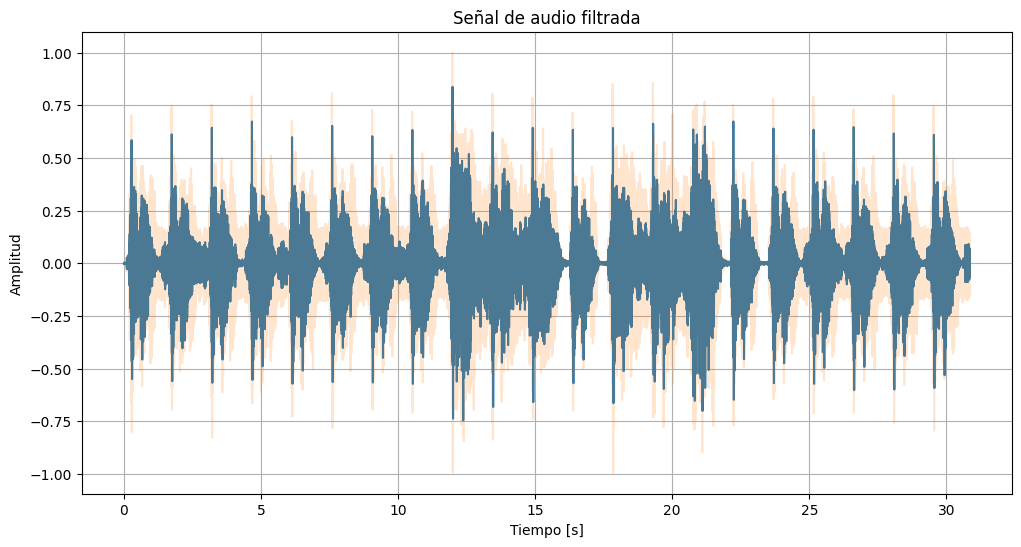

In [6]:
### 4. Pase la señal de audio por el filtro diseñado y escúchela.

# Filtrar la señal de audio
audio_filtrado = signal.lfilter(taps, 1, audio)

# Grafico de la señal filtrada y original
plt.figure(figsize=(12, 6))
plt.plot(t, audio_filtrado)
plt.plot(t, audio, alpha=0.2)
plt.title('Señal de audio filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

# Reproducir audio
display(Audio(audio_filtrado, rate=muestreo))


### 5. ¿Qué instrumentos logra escuchar en el audio filtrado? ¿Fue posible separar algunos instrumentos?, explique.

Ahora se han atenuado notablemente las frecuencias agudas, lo que hace más difícil identificar tanto la guitarra eléctrica como los aplausos, que suelen tener componentes en las frecuencias altas.

### 6. Repita los ítems 3 - 6 para frecuencias de corte de 200 Hz y 15000 Hz. ¿Fue posible separar algunos instrumentos en estos casos?, explique.

In [ ]:
### 6. Repita los ítems 3 - 6 para frecuencias de corte de 200 Hz y 15000 Hz. ¿Fue posible separar algunos instrumentos en estos casos?, explique.

